### Import some tools

In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

C:\Anaconda3\envs\py3-TF2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# First we'll download the data. 
# The data, shuffled and split between train and test sets.
print(type(mnist))
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = mnist.load_data()

<class 'module'>


In [3]:
### ENTER YOUR CODE HERE ###
type(x_train_raw)

numpy.ndarray

In [4]:
type(y_train_raw)

numpy.ndarray

In [5]:
### ENTER YOUR CODE HERE ###
x_train_raw.shape

(60000, 28, 28)

In [6]:
y_train_raw.shape

(60000,)

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Change the value of i and re-run this cell to look at different samples. There's 60,000 to choose from!
i = 10

plt.imshow(x_train_raw[i], cmap='Greys', interpolation='nearest')
plt.show()

print('This image represents the number', y_train_raw[i])

<Figure size 640x480 with 1 Axes>

This image represents the number 3


In [8]:
# This image equal this array
print(x_train_raw[i])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

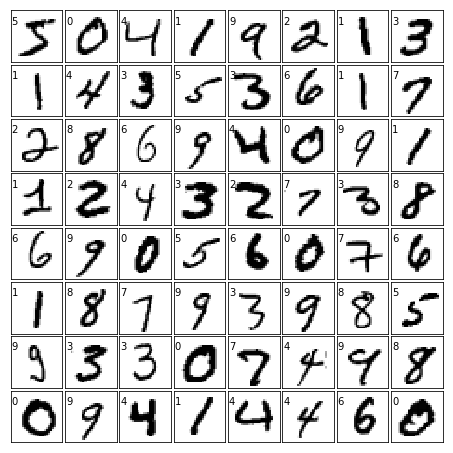

In [9]:
# Import matplotlib
import matplotlib.pyplot as plt

# Figure size (width, height) in inches
fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(x_train_raw[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train_raw[i]))

# Show the plot
plt.show()

### Preparing the data for training

#### Reshaping x


In [10]:
### ENTER YOUR CODE HERE ### (2 lines)
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [11]:
# Let's see what we're working with here
print('Shape of x_train_raw:', x_train.shape)
print('Shape of y_train_raw:', x_test.shape) 

Shape of x_train_raw: (60000, 784)
Shape of y_train_raw: (10000, 784)


In [12]:
x_train[i]
#plt.imshow(x_train_raw[i], cmap='Greys', interpolation='nearest')
#plt.show()

#print('This image represents the number', y_train_raw[i])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 176,
       253, 253, 124,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

#### Rescaling x



In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [14]:
x_train[i]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now all RGB's values have been converted to values ranging from 0 to 1.

#### Categorical encoding y

In [15]:
y_train = tensorflow.keras.utils.to_categorical(y_train_raw,num_classes=10,dtype='float32')
y_test = tensorflow.keras.utils.to_categorical(y_test_raw,num_classes=10,dtype='float32')

---
## Building the neural network

In [16]:

### ENTER YOUR CODE HERE ### (1 line)
model = Sequential()

In [17]:
### ENTER YOUR CODE HERE ### (1 line)
# as first layer in a sequential model:
model.add(Dense(10,activation='softmax',input_shape=(784, )))
# now the model will take as input arrays of shape (784,)and output arrays of shape (10,)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We will already try to see what our model gives with a single layer and there "softmax" activation function !

### Compiling the model

In [20]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

### Training the model

In [21]:

model.fit(x_train, y_train,epochs = 80)

Epoch 1/80
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4675 - accuracy: 0.8767
Epoch 2/80
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3035 - accuracy: 0.9155
Epoch 3/80
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2831 - accuracy: 0.9205
Epoch 4/80
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2730 - accuracy: 0.9239s - loss: 0.2728 - accuracy: 0.
Epoch 5/80
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2664 - accuracy: 0.9258
Epoch 6/80
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2618 - accuracy: 0.9269
Epoch 7/80
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2579 - accuracy: 0.9286
Epoch 8/80
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2556 - accuracy: 0.9290
Epoch 9/80
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2531 - accuracy: 0.9299
Epoch 

### Evaluating the model

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = model.predict(x_test)
print("x_test",type(x_test))
print("x_test",x_test.shape)
print(type(predictions))
print(predictions.shape)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds = (y_test.argmax(axis=1) == predictions.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")


x_test <class 'numpy.ndarray'>
x_test (10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
Accuracy: % 92.65
That means that out of 10000 test samples, this model got 9265 correct and 735 incorrect


In [23]:
print(type(correct_preds))
print(correct_preds.shape)

<class 'numpy.ndarray'>
(10000,)


In [35]:
model2 = Sequential()


model2.add(Dense(10,activation='softmax',input_shape=(784, )))
model2.add(Dense(50,activation='sigmoid')) # 50 is number of the hidden neurons
model2.add(Dense(10,activation='softmax'))




### Compiling the model (again)

In [36]:

model2.compile(optimizer='adam', loss='categorical_crossentropy')

### Training the model (again)

In [37]:
model2.fit(x_train,y_train, epochs=40)

Epoch 1/40
60000/60000 [==============================] - 4s 65us/sample - loss: 1.2903
Epoch 2/40
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8014
Epoch 3/40
60000/60000 [==============================] - 4s 70us/sample - loss: 0.7021
Epoch 4/40
60000/60000 [==============================] - 6s 108us/sample - loss: 0.6306
Epoch 5/40
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4994
Epoch 6/40
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3939
Epoch 7/40
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3532
Epoch 8/40
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3300
Epoch 9/40
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3148
Epoch 10/40
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3032
Epoch 11/40
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2954
Epoch 12/40
60000/60000 [====

### Evaluating the model (again)

In [27]:
predictions2 = model2.predict(x_test)
print("Accuracy: %", accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1)) * 100)

correct_preds2 = (y_test.argmax(axis=1) == predictions2.argmax(axis=1))
print("That means that out of", y_test.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

Accuracy: % 92.65
That means that out of 10000 test samples, this model got 9265 correct and 735 incorrect


### Analyze the errors 

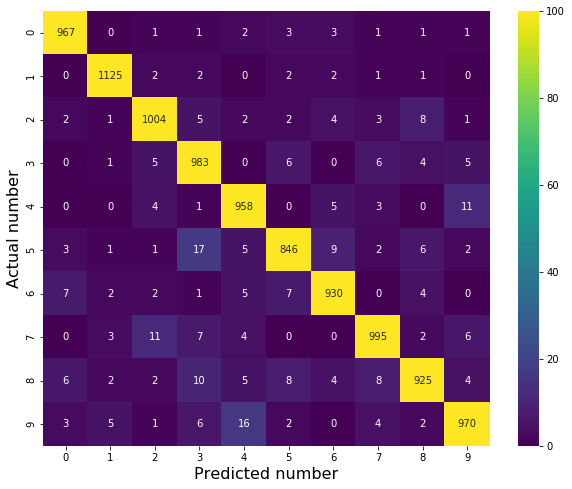

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test.argmax(axis=1), predictions2.argmax(axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="viridis", vmax=100, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted number", fontsize=16)
plt.gca().set_ylabel("Actual number", fontsize = 16)
plt.show()

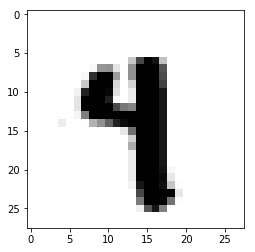

This image represents the number 4

Your model ranked its predictions this way: 

9 	Score: 93.36271
8 	Score: 4.08163
4 	Score: 2.06536
5 	Score: 0.28037
3 	Score: 0.13347
7 	Score: 0.07625
1 	Score: 0.00019
2 	Score: 0.00002
0 	Score: 0.00000
6 	Score: 0.00000


In [29]:
# Every time you run this cell, a random sample will be chosen from the ones that your model made the wrong prediction on

i = np.random.choice(np.where(~correct_preds)[0])

plt.imshow(x_test_raw[i], cmap='Greys', interpolation='nearest')
plt.show()

print("This image represents the number", y_test_raw[i])
print()
print("Your model ranked its predictions this way: \n")
for num, score in sorted(list(enumerate(predictions[i])), key=lambda pair: pair[1], reverse=True):
    print(num, "\tScore: {0:.5f}".format((score) * 100))

### Save your model

In [30]:
model2.save("model.h5")